In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sb

v = pd.read_excel('/Users/USER/Desktop/BIG_RIOS/etc/BIG_Planilha.xlsx' , sheet_name = 'Rio_')
v.index = v['RIO']
v = v.iloc[:,1:]
v
X = v.values
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X1 = pca.transform(X)
#X1.to_excel(r'C:\Users\USER\Desktop\uh.xlsx', index=True)
df = pd.DataFrame(X1, columns=['PC1', 'PC2'])
df = df/1000000
df


,PC1,PC2
0,0.141771,-0.015936
1,0.114147,0.013868
2,-0.050453,-0.006080
3,-0.024392,0.012655
4,-0.052080,-0.007214
5,-0.024906,0.016317
6,-0.051519,-0.006327
7,-0.052567,-0.007284


In [7]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
#X = v.values - já foi gerado lá em cima

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(df)
kmeans.labels_
#plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
df['cluster'] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centers

C:\Users\USER\projeto1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PC1,PC2
0,-0.051655,-0.006726
1,0.114147,0.013868
2,-0.024649,0.014486
3,0.141771,-0.015936


C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\projeto1\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical

<Axes: xlabel='PC1', ylabel='PC2'>

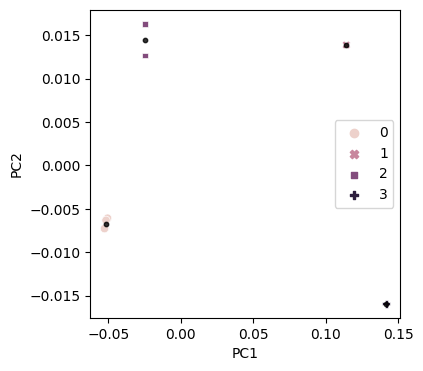

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sb.scatterplot(x='PC1', y='PC2', hue='cluster', style='cluster', ax=ax, data=df)
#sb.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
centers.plot.scatter(x='PC1', y='PC2', ax=ax, s=10, color='black', alpha=0.8)

Text(0, 0.5, 'distance')

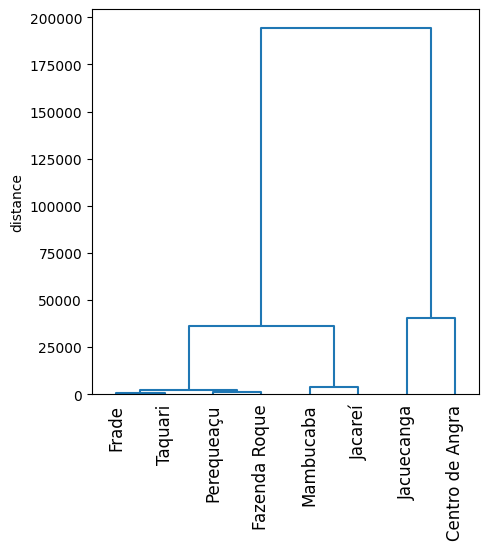

In [9]:
W = linkage(v, method='complete')
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(W, labels=v.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [9]:
#Random Forest
#RANDOM FOREST scarus
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
rf = pd.read_excel('/Users/USER/Desktop/BIG_RIOS/etc/BIG_Planilha.xlsx', sheet_name = 'Planilha5')
y = rf['txc']
X = rf.drop(['txc','local'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#feature_list = ['Royal','IDEB','IQ'] 

model = RandomForestRegressor(n_estimators = 30, random_state=30)

model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)
print('r2', model.score(X_test_scaled, y_test))
#Feature ranking...
#import pandas as pd
#feature_list = list(X.columns)
#feature_imp_rf = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)


Mean squared error using Random Forest:  0.012169837935946929
Mean absolute error Using Random Forest:  0.10756175391166689
r2 -1.4064557974048815


In [4]:
X

,Cadmium resistance,Cobalt-zinc-cadmium resistance,Copper homeostasis,Copper homeostasis: copper tolerance,Mercuric reductase,Mercury resistance operon,Resistance to chromium compounds,Zinc resistance,As,Cd,Co,Cr,Cu,Fe,Al
0,0.003341,0.890320,0.335952,0.041019,0.028366,0.007944,0.066915,0.198951,0.05,0.00,0.00,0.00,0.01,0.09,0.10
1,0.002834,0.874067,0.371166,0.047863,0.022287,0.010761,0.067048,0.148774,4.17,0.08,0.47,1.22,1.03,0.34,0.17
2,0.003546,0.786028,0.335563,0.044888,0.022709,0.004475,0.078052,0.046435,4.14,0.08,0.38,0.74,1.62,0.18,0.10
3,0.016774,0.893336,0.529082,0.074887,0.020339,0.024693,0.058730,0.046075,4.37,0.08,0.39,1.27,2.10,0.87,0.12
4,0.041879,0.851775,0.473344,0.069544,0.013866,0.016369,0.031125,0.045188,4.37,0.08,0.39,1.27,2.10,0.87,0.12
5,0.002676,0.876615,0.340377,0.039780,0.017282,0.002926,0.111206,0.043189,4.10,0.07,0.36,1.08,1.40,0.11,0.06
6,0.001350,0.745000,0.394000,0.049200,0.007107,0.008094,0.082122,0.039088,4.10,0.07,0.36,1.08,1.40,0.11,0.06
7,0.026797,0.878539,0.579261,0.063103,0.016538,0.029437,0.061586,0.031767,4.19,0.08,0.51,1.29,2.26,0.46,0.23
8,0.001358,0.761000,0.336700,0.042149,0.009668,0.004191,0.063513,0.049903,4.11,0.08,0.45,2.20,2.15,0.20,0.25
9,0.005939,0.799195,0.462912,0.050506,0.026872,0.015994,0.072259,0.106356,4.10,0.07,0.36,1.08,1.40,0.11,0.06


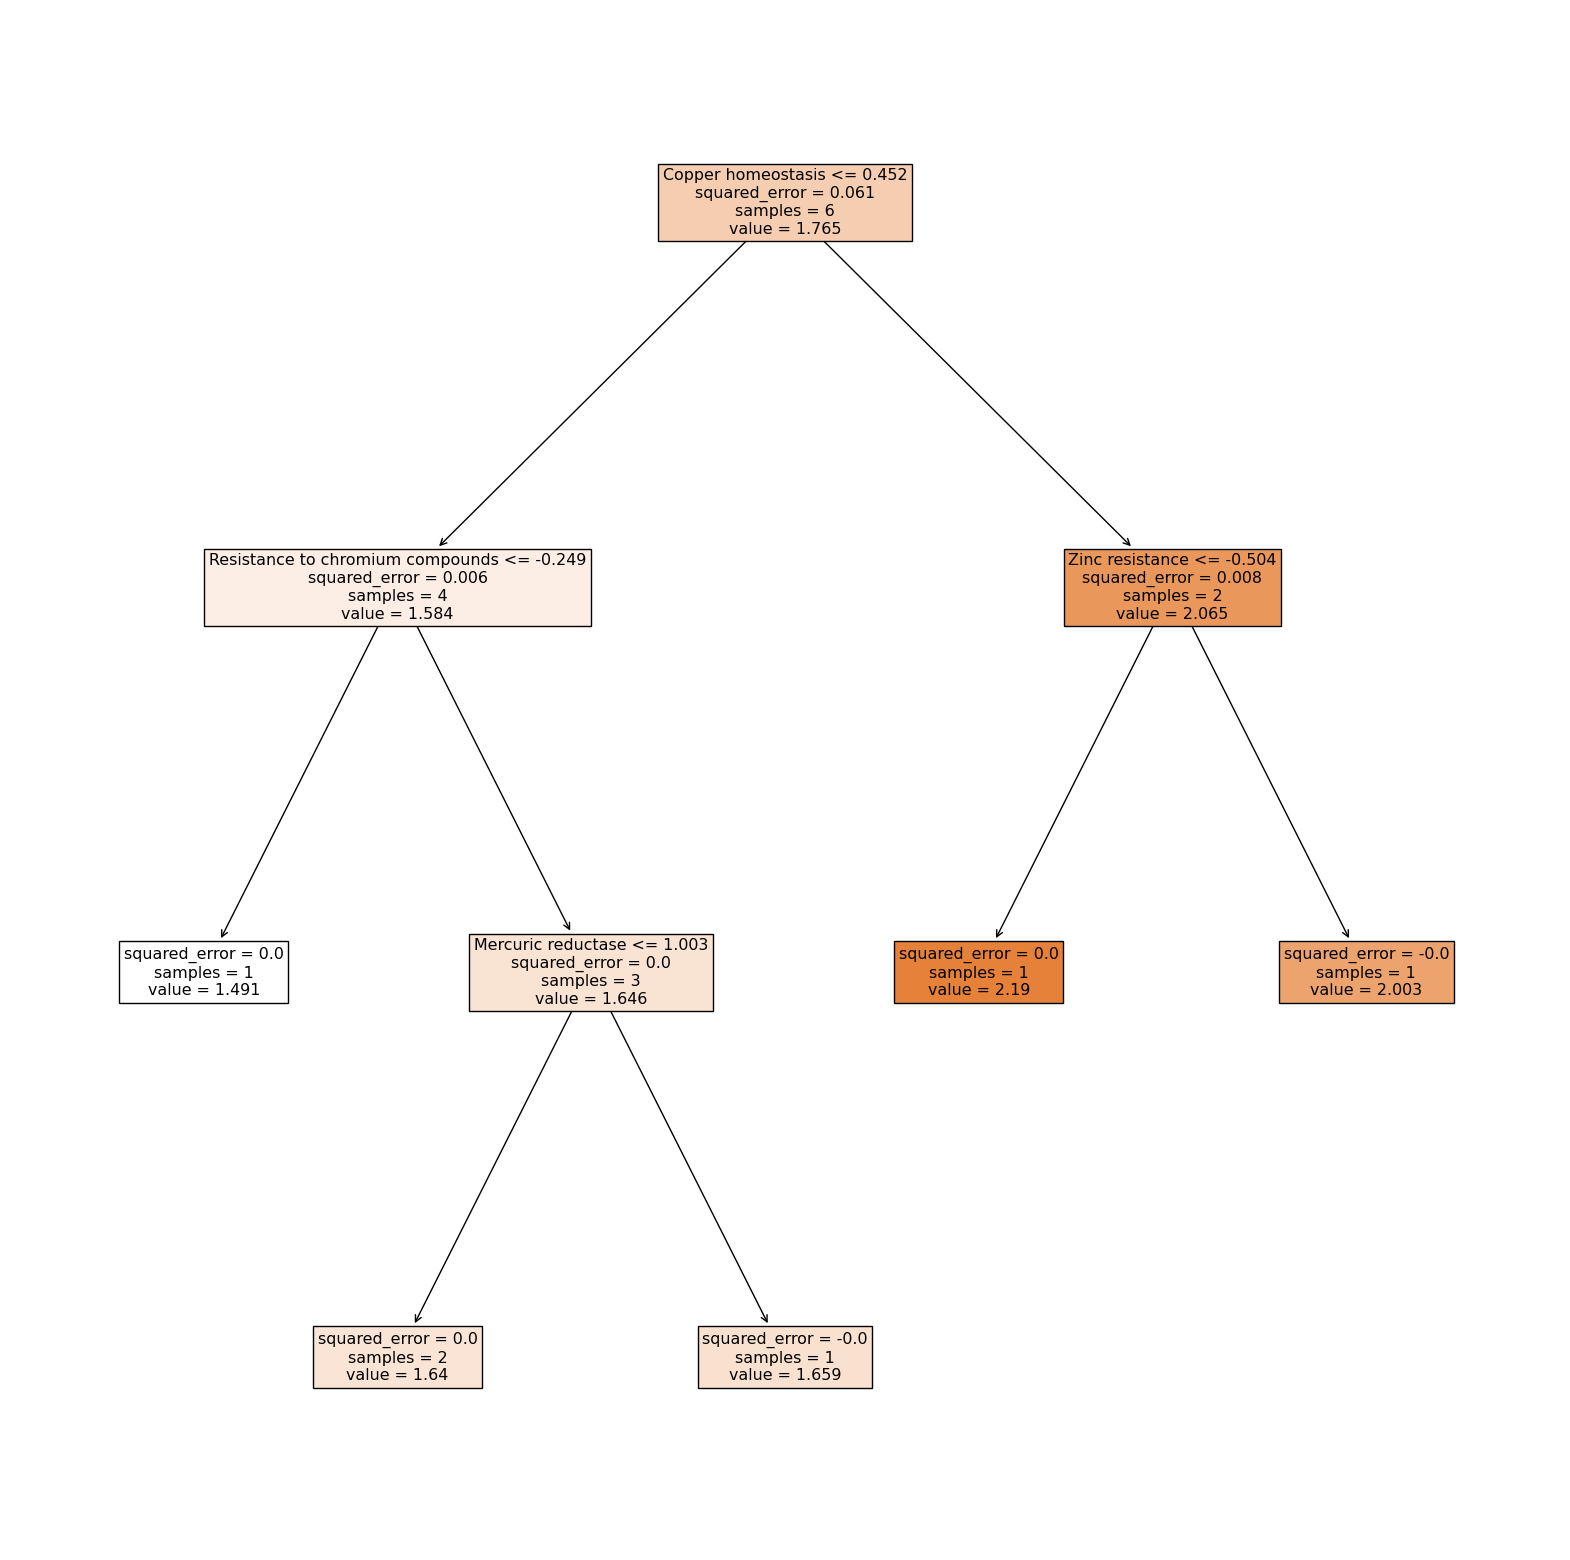

In [5]:
#Grafico_RF
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler# will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
rf = pd.read_excel('/Users/USER/Desktop/BIG_RIOS/etc/BIG_Planilha.xlsx', sheet_name = 'Planilha5')
y = rf['arg']
X = rf.drop(['arg','local'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf = RandomForestRegressor(n_estimators=100,max_depth=3)
rf.fit(X_train_scaled, y_train)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)